# Vikram Anand
## 21105129

## Assignment 2

### Importing required libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
import os
import cv2
from sklearn.model_selection import train_test_split

### Defining file path
##### p = "folderpath" and adding '/' to open the folder to get to the jpg files.

In [30]:
p = "E:\\MTech2\\projects\\cnn\\CDimg" + "/"

### Defination for Preprocessing the images

In [31]:
def preprocessing(folder, dimension):
    pr_data = []
    for filename in os.listdir(folder):

        if not filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue
        label=None
        features = None
        try:
            path = os.path.join(folder, filename)
            x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            if x is None:
                print(f"⚠️ Failed to read image: {filename}")
                continue


            feature = cv2.resize(x, dimension)
            fd, hog_img = hog(feature, orientations = 9, pixels_per_cell= (8, 8), cells_per_block=(2,2,),visualize = True)
            features = hog_img.flatten()
        except Exception as e:
            print(f"⚠️ Error processing {filename}: {e}")
            continue    
        
        if (filename[0:3]=="cat")==True:   
            label = 0
        elif (filename[0:3]=="dog")==True: 
            label = 1                        
        else :
          continue
          
        pr_data.append(np.hstack(np.array([features, label],dtype=object)))

    if len(pr_data) == 0:
        raise ValueError("❌ No valid images were processed. Check folder path and filenames.")

    data = np.vstack(pr_data)
    return data

### Preprocessing the images and creating array

In [32]:
dimension = (50,50)
data = preprocessing(p,dimension)
X,Y = data[:,:-1],data[:,-1]
ss = StandardScaler()
a = ss.fit_transform(X)
b = Y
print('Shape of a is: ', a.shape)
print('Shape of b is: ', b.shape)

Shape of a is:  (25000, 2500)
Shape of b is:  (25000,)


### Spliting data into train and test data
##### 30 % of data to test data & 70 % to train data.

In [33]:
train_features, test_features, train_labels, test_labels = train_test_split(a, b, test_size=0.30)

### Definition to compare Prediction for random entry from Test data. 

In [34]:
def test_vs_pred(test_labels,prediction):    
    i=np.random.randint(len(test_labels))
    if test_labels[i]==1:
        print('Randomly selected output from Test data = Dog')
    elif test_labels[i]==0:
        print('Randomly selected output from Test data = Cat')
    if prediction[i]==1:
        print('Prediction for that output = Dog')
    elif prediction[i]==0:
        print('Prediction for that output = Cat')

### K-Nearest Neighbour (KNN) implementation

Accuracy =  64.16 %
[0. 1. 1. ... 0. 1. 0.]
[1. 1. 0. ... 0. 0. 1.]
Randomly selected output from Test data = Dog
Prediction for that output = Dog


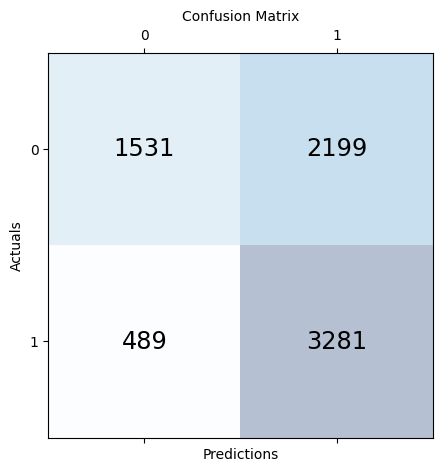

In [35]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(train_features,train_labels)
pred = knn.predict(test_features)
accuracy = knn.score(test_features,test_labels)
con = metrics.confusion_matrix(test_labels,pred)
print('Accuracy = ', accuracy*100,'%')
print(pred)
print(test_labels)
test_vs_pred(test_labels,pred)
fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(con, cmap=plt.cm.Blues, alpha=0.3)
for i in range(con.shape[0]):
    for j in range(con.shape[1]):
        ax.text(x=j, y=i, s=con[i,j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

### Logistic regression (LR) implementation

Accuracy =  68.45333333333333 %
[0. 1. 0. ... 0. 0. 0.]
[1. 1. 0. ... 0. 0. 1.]
Randomly selected output from Test data = Cat
Prediction for that output = Dog


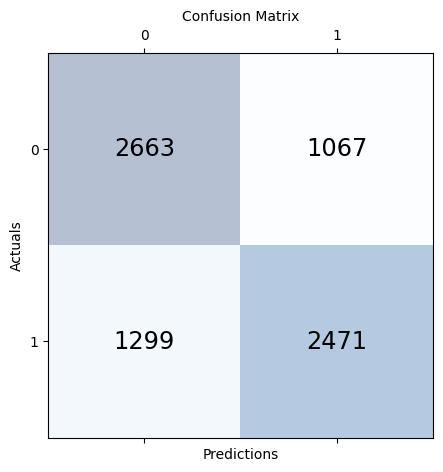

In [36]:
LR = LogisticRegression(C = 0.00001,solver='liblinear', max_iter=1000)
LR.fit(train_features,train_labels)
predl = LR.predict(test_features)
accuracyl = LR.score(test_features,test_labels)
print('Accuracy = ', accuracyl*100,'%')
print(predl)
print(test_labels)
test_vs_pred(test_labels,predl)
conl = metrics.confusion_matrix(test_labels,predl)
figl, axl = plt.subplots(figsize=(5,5))
axl.matshow(conl, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conl.shape[0]):
    for j in range(conl.shape[1]):
        axl.text(x=j, y=i, s=conl[i,j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

### Support Vector Classifier (SVC) implementation

#### Linear SVC

Accuracy =  71.01333333333332 %
[0. 1. 1. ... 0. 0. 0.]
[1. 1. 0. ... 0. 0. 1.]
Randomly selected output from Test data = Dog
Prediction for that output = Dog


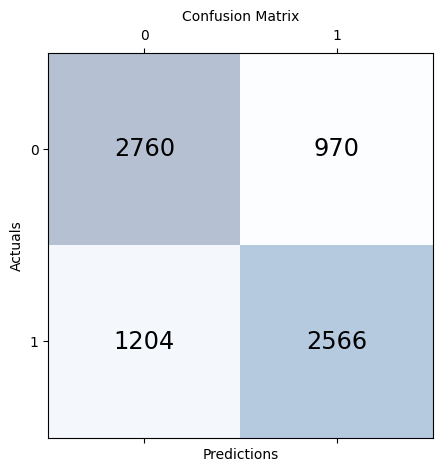

In [37]:
svcl = LinearSVC(penalty="l2", loss="squared_hinge", dual=True, tol=0.0001, C=0.00001, multi_class="ovr", fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=20000)
svcl.fit(train_features,train_labels)
predn = svcl.predict(test_features)
accuracyn = svcl.score(test_features,test_labels)
conn = metrics.confusion_matrix(test_labels,predn)
print('Accuracy = ', accuracyn*100,'%')
print(predn)
print(test_labels)
test_vs_pred(test_labels,predn)
fign, axn = plt.subplots(figsize=(5,5))
axn.matshow(conn, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conn.shape[0]):
    for j in range(conn.shape[1]):
        axn.text(x=j, y=i, s=conn[i,j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

#### Non Linear SVC

Accuracy =  74.11999999999999 %
[0. 1. 0. ... 0. 0. 0.]
[1. 1. 0. ... 0. 0. 1.]
Randomly selected output from Test data = Cat
Prediction for that output = Dog


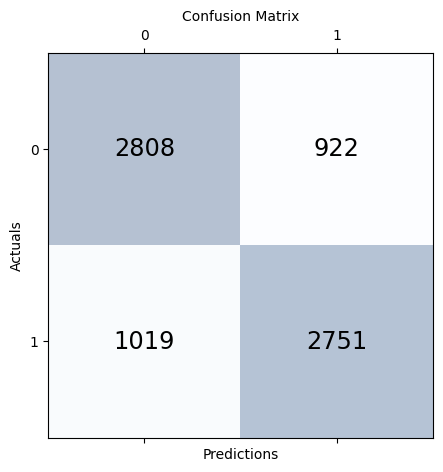

In [38]:
svc = SVC(C=1,kernel = 'rbf',gamma='auto')
svc.fit(train_features,train_labels)
preds = svc.predict(test_features)
accuracys = svc.score(test_features,test_labels)
cons = metrics.confusion_matrix(test_labels,preds)
print('Accuracy = ', accuracys*100,'%')
print(preds)
print(test_labels)
test_vs_pred(test_labels,preds)
figs, axs = plt.subplots(figsize=(5,5))
axs.matshow(cons, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cons.shape[0]):
    for j in range(cons.shape[1]):
        axs.text(x=j, y=i, s=cons[i,j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()